In [1]:
# 1) Customer Demographics and Marketing Effectiveness

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('/Users/lakshmiande/Desktop/supervue ai datasets/freshfarms_corrected_raw.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  250 non-null    object 
 1   Location_Zone              250 non-null    object 
 2   Hourly_Footfall            222 non-null    float64
 3   Dwell_Time_Seconds         250 non-null    float64
 4   Product_Interaction_Count  240 non-null    float64
 5   Customer_Path_Sequence     250 non-null    object 
 6   Estimated_Age_Range        250 non-null    object 
 7   Estimated_Gender           196 non-null    object 
 8   Marketing_Campaign_ID      199 non-null    object 
 9   Sales_Quantity_From_Zone   250 non-null    int64  
 10  Sales_Revenue_From_Zone    250 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 21.6+ KB


In [6]:
data.describe()

,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone
count,222.000000,250.000000,240.000000,250.000000,250.000000
mean,119.594595,336.504880,9.962500,19.832000,182.729821
std,11.923875,179.897269,3.138813,4.607024,85.706459
min,50.000000,100.260000,5.000000,9.000000,39.936594
25%,113.000000,252.975000,8.000000,17.000000,114.709859
50%,121.000000,318.575000,10.000000,20.000000,172.277562
75%,127.000000,402.907500,12.000000,22.000000,231.800294
max,150.000000,2500.000000,19.000000,35.000000,457.769613


In [7]:
data.head(10)

,Timestamp,Location_Zone,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Customer_Path_Sequence,Estimated_Age_Range,Estimated_Gender,Marketing_Campaign_ID,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone
0,2024-07-05 18:00:00,promo zone,122.0,462.65,13.0,Dairy Section -> Produce Aisle -> Checkout -> ...,18-24,Female,FFM102,15,111.001706
1,2024-07-19 16:00:00,promo zone,102.0,649.00,9.0,Produce Aisle -> Dairy Section -> Checkout -> ...,18-24,Male,FFM102,23,221.885053
2,2024-07-12 08:00:00,promo zone,111.0,351.38,14.0,Dairy Section -> Frozen Foods -> Promo Zone,45-54,NaN,NaN,19,200.374725
3,2024-07-05 11:00:00,promo zone,119.0,274.32,9.0,Produce Aisle -> New Arrivals -> Frozen Foods ...,45-54,Female,FFM107,22,165.138104
4,2024-07-03 14:00:00,checkout,125.0,463.81,10.0,Checkout -> Dairy Section -> New Arrivals -> F...,35-44,Female,FFM100,18,74.764158
5,2024-07-01 12:00:00,Dairy Section,123.0,450.10,13.0,Dairy Section -> Frozen Foods -> Promo Zone ->...,18-24,Female,FFM104,19,230.396845
6,2024-07-06 15:00:00,promo zone,122.0,336.55,7.0,Produce Aisle -> New Arrivals -> Dairy Section...,18-24,Male,FFM102,25,369.751277
7,2024-07-20 16:00:00,Dairy Section,122.0,142.03,18.0,Promo Zone -> Produce Aisle -> Checkout,18-24,Unknown,FFM101,18,162.829104
8,2024-07-09 17:00:00,Dairy Section,115.0,242.61,15.0,Frozen Foods -> Produce Aisle,18-24,Unknown,FFM107,13,220.844248
9,2024-07-14 20:00:00,Produce Aisle,123.0,253.56,6.0,Produce Aisle -> Checkout -> New Arrivals -> P...,55+,Female,FFM102,19,235.767607


In [8]:
data.isnull().any()

Timestamp                    False
Location_Zone                False
Hourly_Footfall               True
Dwell_Time_Seconds           False
Product_Interaction_Count     True
Customer_Path_Sequence       False
Estimated_Age_Range          False
Estimated_Gender              True
Marketing_Campaign_ID         True
Sales_Quantity_From_Zone     False
Sales_Revenue_From_Zone      False
dtype: bool

In [9]:
data.isnull().sum()

Timestamp                     0
Location_Zone                 0
Hourly_Footfall              28
Dwell_Time_Seconds            0
Product_Interaction_Count    10
Customer_Path_Sequence        0
Estimated_Age_Range           0
Estimated_Gender             54
Marketing_Campaign_ID        51
Sales_Quantity_From_Zone      0
Sales_Revenue_From_Zone       0
dtype: int64

In [10]:
data.head()

,Timestamp,Location_Zone,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Customer_Path_Sequence,Estimated_Age_Range,Estimated_Gender,Marketing_Campaign_ID,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone
0,2024-07-05 18:00:00,promo zone,122.0,462.65,13.0,Dairy Section -> Produce Aisle -> Checkout -> ...,18-24,Female,FFM102,15,111.001706
1,2024-07-19 16:00:00,promo zone,102.0,649.00,9.0,Produce Aisle -> Dairy Section -> Checkout -> ...,18-24,Male,FFM102,23,221.885053
2,2024-07-12 08:00:00,promo zone,111.0,351.38,14.0,Dairy Section -> Frozen Foods -> Promo Zone,45-54,NaN,NaN,19,200.374725
3,2024-07-05 11:00:00,promo zone,119.0,274.32,9.0,Produce Aisle -> New Arrivals -> Frozen Foods ...,45-54,Female,FFM107,22,165.138104
4,2024-07-03 14:00:00,checkout,125.0,463.81,10.0,Checkout -> Dairy Section -> New Arrivals -> F...,35-44,Female,FFM100,18,74.764158


In [11]:
data['Hourly_Footfall'] = data['Hourly_Footfall'].fillna(data['Hourly_Footfall'].mean())

In [12]:
data['Hourly_Footfall'].isnull().any()

False

In [13]:
data['Hourly_Footfall'].isnull().sum()

0

In [14]:
data['Product_Interaction_Count'] = data['Product_Interaction_Count'].fillna(data['Product_Interaction_Count'].mean())

In [15]:
data['Product_Interaction_Count'].isnull().any()

False

In [16]:
data['Estimated_Gender'] = data['Estimated_Gender'].fillna(data['Estimated_Gender'].mode().iloc[0])

In [17]:
data['Marketing_Campaign_ID'] = data['Marketing_Campaign_ID'].fillna(data['Marketing_Campaign_ID'].mode().iloc[0])

In [18]:
data.isnull().any()

Timestamp                    False
Location_Zone                False
Hourly_Footfall              False
Dwell_Time_Seconds           False
Product_Interaction_Count    False
Customer_Path_Sequence       False
Estimated_Age_Range          False
Estimated_Gender             False
Marketing_Campaign_ID        False
Sales_Quantity_From_Zone     False
Sales_Revenue_From_Zone      False
dtype: bool

In [19]:
data.isnull().sum()

Timestamp                    0
Location_Zone                0
Hourly_Footfall              0
Dwell_Time_Seconds           0
Product_Interaction_Count    0
Customer_Path_Sequence       0
Estimated_Age_Range          0
Estimated_Gender             0
Marketing_Campaign_ID        0
Sales_Quantity_From_Zone     0
Sales_Revenue_From_Zone      0
dtype: int64

In [20]:
data.drop_duplicates()

,Timestamp,Location_Zone,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Customer_Path_Sequence,Estimated_Age_Range,Estimated_Gender,Marketing_Campaign_ID,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone
0,2024-07-05 18:00:00,promo zone,122.0,462.65,13.0,Dairy Section -> Produce Aisle -> Checkout -> ...,18-24,Female,FFM102,15,111.001706
1,2024-07-19 16:00:00,promo zone,102.0,649.00,9.0,Produce Aisle -> Dairy Section -> Checkout -> ...,18-24,Male,FFM102,23,221.885053
2,2024-07-12 08:00:00,promo zone,111.0,351.38,14.0,Dairy Section -> Frozen Foods -> Promo Zone,45-54,Female,FFM109,19,200.374725
3,2024-07-05 11:00:00,promo zone,119.0,274.32,9.0,Produce Aisle -> New Arrivals -> Frozen Foods ...,45-54,Female,FFM107,22,165.138104
4,2024-07-03 14:00:00,checkout,125.0,463.81,10.0,Checkout -> Dairy Section -> New Arrivals -> F...,35-44,Female,FFM100,18,74.764158
...,...,...,...,...,...,...,...,...,...,...,...
245,2024-07-02 15:00:00,Produce Aisle,109.0,306.85,6.0,Produce Aisle -> Frozen Foods -> Checkout -> N...,18-24,Female,FFM109,20,154.473817
246,2024-07-20 18:00:00,checkout,127.0,554.60,6.0,Dairy Section -> Frozen Foods -> Checkout -> P...,35-44,Female,FFM104,12,67.257174
247,2024-07-20 09:00:00,new arrivals,119.0,341.31,9.0,Promo Zone -> Produce Aisle,35-44,Unknown,FFM109,18,257.651722
248,2024-07-16 16:00:00,Dairy Section,107.0,357.93,10.0,Produce Aisle -> Frozen Foods -> Dairy Section...,18-24,Male,FFM103,16,167.074060


In [21]:
data.describe()

,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone
count,250.000000,250.000000,250.000000,250.000000,250.000000
mean,119.594595,336.504880,9.962500,19.832000,182.729821
std,11.233469,179.897269,3.075138,4.607024,85.706459
min,50.000000,100.260000,5.000000,9.000000,39.936594
25%,114.000000,252.975000,8.000000,17.000000,114.709859
50%,119.594595,318.575000,9.962500,20.000000,172.277562
75%,126.000000,402.907500,12.000000,22.000000,231.800294
max,150.000000,2500.000000,19.000000,35.000000,457.769613


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  250 non-null    object 
 1   Location_Zone              250 non-null    object 
 2   Hourly_Footfall            250 non-null    float64
 3   Dwell_Time_Seconds         250 non-null    float64
 4   Product_Interaction_Count  250 non-null    float64
 5   Customer_Path_Sequence     250 non-null    object 
 6   Estimated_Age_Range        250 non-null    object 
 7   Estimated_Gender           250 non-null    object 
 8   Marketing_Campaign_ID      250 non-null    object 
 9   Sales_Quantity_From_Zone   250 non-null    int64  
 10  Sales_Revenue_From_Zone    250 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 21.6+ KB


In [23]:
data.isnull().any()

Timestamp                    False
Location_Zone                False
Hourly_Footfall              False
Dwell_Time_Seconds           False
Product_Interaction_Count    False
Customer_Path_Sequence       False
Estimated_Age_Range          False
Estimated_Gender             False
Marketing_Campaign_ID        False
Sales_Quantity_From_Zone     False
Sales_Revenue_From_Zone      False
dtype: bool

In [24]:
data.head()

,Timestamp,Location_Zone,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Customer_Path_Sequence,Estimated_Age_Range,Estimated_Gender,Marketing_Campaign_ID,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone
0,2024-07-05 18:00:00,promo zone,122.0,462.65,13.0,Dairy Section -> Produce Aisle -> Checkout -> ...,18-24,Female,FFM102,15,111.001706
1,2024-07-19 16:00:00,promo zone,102.0,649.00,9.0,Produce Aisle -> Dairy Section -> Checkout -> ...,18-24,Male,FFM102,23,221.885053
2,2024-07-12 08:00:00,promo zone,111.0,351.38,14.0,Dairy Section -> Frozen Foods -> Promo Zone,45-54,Female,FFM109,19,200.374725
3,2024-07-05 11:00:00,promo zone,119.0,274.32,9.0,Produce Aisle -> New Arrivals -> Frozen Foods ...,45-54,Female,FFM107,22,165.138104
4,2024-07-03 14:00:00,checkout,125.0,463.81,10.0,Checkout -> Dairy Section -> New Arrivals -> F...,35-44,Female,FFM100,18,74.764158


In [25]:
data['Location_Zone'].unique()

array(['promo zone', 'checkout', 'Dairy Section', 'Produce Aisle',
       'new arrivals', 'Frozen Foods', 'check-out'], dtype=object)

In [26]:
data['Estimated_Gender'].unique()

array(['Female', 'Male', 'Unknown', 'unknown'], dtype=object)

In [27]:
data['Estimated_Gender'] = data['Estimated_Gender'].replace({'FEMALE':'Female', 'unknown':'Unknown'})

In [28]:
data['Estimated_Gender'].unique()

array(['Female', 'Male', 'Unknown'], dtype=object)

In [29]:
data.isna().any()

Timestamp                    False
Location_Zone                False
Hourly_Footfall              False
Dwell_Time_Seconds           False
Product_Interaction_Count    False
Customer_Path_Sequence       False
Estimated_Age_Range          False
Estimated_Gender             False
Marketing_Campaign_ID        False
Sales_Quantity_From_Zone     False
Sales_Revenue_From_Zone      False
dtype: bool

In [30]:
data['Marketing_Campaign_ID'].unique()

array(['FFM102', 'FFM109', 'FFM107', 'FFM100', 'FFM104', 'FFM101',
       'FFM106', 'FFM105', 'FFM103', 'FFM108'], dtype=object)

In [31]:
data['Marketing_Campaign_ID'].value_counts()

FFM109    77
FFM107    25
FFM105    24
FFM100    23
FFM102    20
FFM104    19
FFM106    17
FFM103    17
FFM108    15
FFM101    13
Name: Marketing_Campaign_ID, dtype: int64

In [32]:
data['Customer_Path_Sequence'].unique()

array(['Dairy Section -> Produce Aisle -> Checkout -> New Arrivals',
       'Produce Aisle -> Dairy Section -> Checkout -> New Arrivals',
       'Dairy Section -> Frozen Foods -> Promo Zone',
       'Produce Aisle -> New Arrivals -> Frozen Foods -> Promo Zone',
       'Checkout -> Dairy Section -> New Arrivals -> Frozen Foods',
       'Dairy Section -> Frozen Foods -> Promo Zone -> Checkout',
       'Produce Aisle -> New Arrivals -> Dairy Section -> Promo Zone',
       'Promo Zone -> Produce Aisle -> Checkout',
       'Frozen Foods -> Produce Aisle',
       'Produce Aisle -> Checkout -> New Arrivals -> Promo Zone',
       'Promo Zone -> New Arrivals',
       'Promo Zone -> Frozen Foods -> Checkout',
       'Dairy Section -> Produce Aisle', 'Produce Aisle -> New Arrivals',
       'Frozen Foods -> Checkout -> New Arrivals -> Promo Zone',
       'Promo Zone -> New Arrivals -> Dairy Section -> Produce Aisle',
       'Dairy Section -> Produce Aisle -> Promo Zone',
       'Checkout -> Dairy 

In [33]:
data.head()

,Timestamp,Location_Zone,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Customer_Path_Sequence,Estimated_Age_Range,Estimated_Gender,Marketing_Campaign_ID,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone
0,2024-07-05 18:00:00,promo zone,122.0,462.65,13.0,Dairy Section -> Produce Aisle -> Checkout -> ...,18-24,Female,FFM102,15,111.001706
1,2024-07-19 16:00:00,promo zone,102.0,649.00,9.0,Produce Aisle -> Dairy Section -> Checkout -> ...,18-24,Male,FFM102,23,221.885053
2,2024-07-12 08:00:00,promo zone,111.0,351.38,14.0,Dairy Section -> Frozen Foods -> Promo Zone,45-54,Female,FFM109,19,200.374725
3,2024-07-05 11:00:00,promo zone,119.0,274.32,9.0,Produce Aisle -> New Arrivals -> Frozen Foods ...,45-54,Female,FFM107,22,165.138104
4,2024-07-03 14:00:00,checkout,125.0,463.81,10.0,Checkout -> Dairy Section -> New Arrivals -> F...,35-44,Female,FFM100,18,74.764158


In [34]:
data["Revenue_per_Footfall"] = data["Sales_Revenue_From_Zone"] / (data["Hourly_Footfall"] + 1)
data["Revenue_per_Sale"] = data["Sales_Revenue_From_Zone"] / (data["Sales_Quantity_From_Zone"] + 1)
data["Interaction_Rate"] = data["Product_Interaction_Count"] / (data["Hourly_Footfall"] + 1)

In [35]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['month'] = data['Timestamp'].dt.month
data['day'] = data['Timestamp'].dt.day
data['hour'] = data['Timestamp'].dt.hour



In [36]:
data.head()

,Timestamp,Location_Zone,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Customer_Path_Sequence,Estimated_Age_Range,Estimated_Gender,Marketing_Campaign_ID,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone,Revenue_per_Footfall,Revenue_per_Sale,Interaction_Rate,month,day,hour
0,2024-07-05 18:00:00,promo zone,122.0,462.65,13.0,Dairy Section -> Produce Aisle -> Checkout -> ...,18-24,Female,FFM102,15,111.001706,0.902453,6.937607,0.105691,7,5,18
1,2024-07-19 16:00:00,promo zone,102.0,649.00,9.0,Produce Aisle -> Dairy Section -> Checkout -> ...,18-24,Male,FFM102,23,221.885053,2.154224,9.245211,0.087379,7,19,16
2,2024-07-12 08:00:00,promo zone,111.0,351.38,14.0,Dairy Section -> Frozen Foods -> Promo Zone,45-54,Female,FFM109,19,200.374725,1.789060,10.018736,0.125000,7,12,8
3,2024-07-05 11:00:00,promo zone,119.0,274.32,9.0,Produce Aisle -> New Arrivals -> Frozen Foods ...,45-54,Female,FFM107,22,165.138104,1.376151,7.179918,0.075000,7,5,11
4,2024-07-03 14:00:00,checkout,125.0,463.81,10.0,Checkout -> Dairy Section -> New Arrivals -> F...,35-44,Female,FFM100,18,74.764158,0.593366,3.934956,0.079365,7,3,14


In [37]:
data = data.drop('Timestamp', axis=1)

In [38]:
data.head()

,Location_Zone,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Customer_Path_Sequence,Estimated_Age_Range,Estimated_Gender,Marketing_Campaign_ID,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone,Revenue_per_Footfall,Revenue_per_Sale,Interaction_Rate,month,day,hour
0,promo zone,122.0,462.65,13.0,Dairy Section -> Produce Aisle -> Checkout -> ...,18-24,Female,FFM102,15,111.001706,0.902453,6.937607,0.105691,7,5,18
1,promo zone,102.0,649.00,9.0,Produce Aisle -> Dairy Section -> Checkout -> ...,18-24,Male,FFM102,23,221.885053,2.154224,9.245211,0.087379,7,19,16
2,promo zone,111.0,351.38,14.0,Dairy Section -> Frozen Foods -> Promo Zone,45-54,Female,FFM109,19,200.374725,1.789060,10.018736,0.125000,7,12,8
3,promo zone,119.0,274.32,9.0,Produce Aisle -> New Arrivals -> Frozen Foods ...,45-54,Female,FFM107,22,165.138104,1.376151,7.179918,0.075000,7,5,11
4,checkout,125.0,463.81,10.0,Checkout -> Dairy Section -> New Arrivals -> F...,35-44,Female,FFM100,18,74.764158,0.593366,3.934956,0.079365,7,3,14


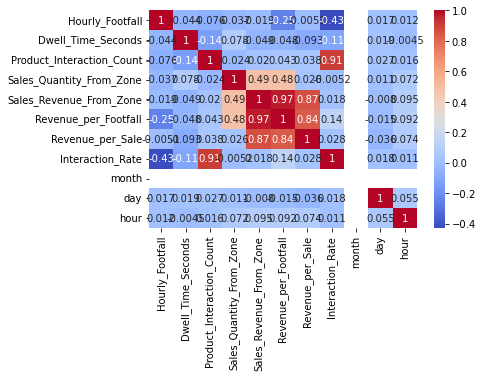

<Figure size 576x432 with 0 Axes>

In [39]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.figure(figsize = (8,6))
plt.show()

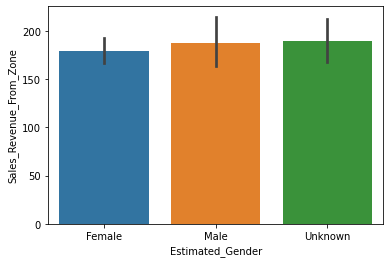

<Figure size 576x432 with 0 Axes>

In [40]:
sns.barplot(x = data['Estimated_Gender'], y = data['Sales_Revenue_From_Zone'])
plt.figure(figsize = (8,6))
plt.show()

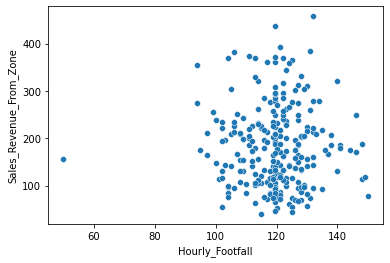

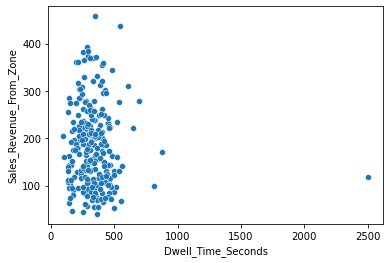

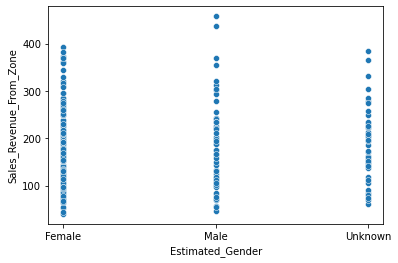

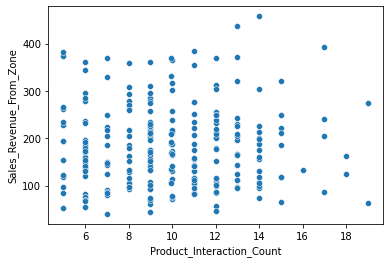

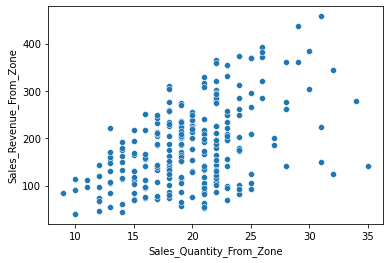

In [41]:
for col in ['Hourly_Footfall','Dwell_Time_Seconds','Estimated_Gender','Product_Interaction_Count','Sales_Quantity_From_Zone']:
    sns.scatterplot(x=data[col], y=data['Sales_Revenue_From_Zone'])
    plt.show()


In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
data = pd.get_dummies(data, columns=['Location_Zone','Customer_Path_Sequence','Estimated_Age_Range','Estimated_Gender','Marketing_Campaign_ID'], drop_first=False)

In [44]:
data.head()

,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone,Revenue_per_Footfall,Revenue_per_Sale,Interaction_Rate,month,day,...,Marketing_Campaign_ID_FFM100,Marketing_Campaign_ID_FFM101,Marketing_Campaign_ID_FFM102,Marketing_Campaign_ID_FFM103,Marketing_Campaign_ID_FFM104,Marketing_Campaign_ID_FFM105,Marketing_Campaign_ID_FFM106,Marketing_Campaign_ID_FFM107,Marketing_Campaign_ID_FFM108,Marketing_Campaign_ID_FFM109
0,122.0,462.65,13.0,15,111.001706,0.902453,6.937607,0.105691,7,5,...,0,0,1,0,0,0,0,0,0,0
1,102.0,649.00,9.0,23,221.885053,2.154224,9.245211,0.087379,7,19,...,0,0,1,0,0,0,0,0,0,0
2,111.0,351.38,14.0,19,200.374725,1.789060,10.018736,0.125000,7,12,...,0,0,0,0,0,0,0,0,0,1
3,119.0,274.32,9.0,22,165.138104,1.376151,7.179918,0.075000,7,5,...,0,0,0,0,0,0,0,1,0,0
4,125.0,463.81,10.0,18,74.764158,0.593366,3.934956,0.079365,7,3,...,1,0,0,0,0,0,0,0,0,0


In [45]:
data.isnull().any()

Hourly_Footfall                 False
Dwell_Time_Seconds              False
Product_Interaction_Count       False
Sales_Quantity_From_Zone        False
Sales_Revenue_From_Zone         False
                                ...  
Marketing_Campaign_ID_FFM105    False
Marketing_Campaign_ID_FFM106    False
Marketing_Campaign_ID_FFM107    False
Marketing_Campaign_ID_FFM108    False
Marketing_Campaign_ID_FFM109    False
Length: 198, dtype: bool

In [46]:
data.isna().sum()

Hourly_Footfall                 0
Dwell_Time_Seconds              0
Product_Interaction_Count       0
Sales_Quantity_From_Zone        0
Sales_Revenue_From_Zone         0
                               ..
Marketing_Campaign_ID_FFM105    0
Marketing_Campaign_ID_FFM106    0
Marketing_Campaign_ID_FFM107    0
Marketing_Campaign_ID_FFM108    0
Marketing_Campaign_ID_FFM109    0
Length: 198, dtype: int64

In [47]:
data.describe()

,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone,Revenue_per_Footfall,Revenue_per_Sale,Interaction_Rate,month,day,...,Marketing_Campaign_ID_FFM100,Marketing_Campaign_ID_FFM101,Marketing_Campaign_ID_FFM102,Marketing_Campaign_ID_FFM103,Marketing_Campaign_ID_FFM104,Marketing_Campaign_ID_FFM105,Marketing_Campaign_ID_FFM106,Marketing_Campaign_ID_FFM107,Marketing_Campaign_ID_FFM108,Marketing_Campaign_ID_FFM109
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.0,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,119.594595,336.504880,9.962500,19.832000,182.729821,1.532044,8.751624,0.083812,7.0,12.748000,...,0.092000,0.052000,0.080000,0.068000,0.07600,0.096000,0.068000,0.100000,0.060000,0.308000
std,11.233469,179.897269,3.075138,4.607024,85.706459,0.739073,3.423536,0.030191,0.0,6.989126,...,0.289606,0.222472,0.271837,0.252251,0.26553,0.295182,0.252251,0.300602,0.237963,0.462593
min,50.000000,100.260000,5.000000,9.000000,39.936594,0.344281,2.391758,0.038462,7.0,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,252.975000,8.000000,17.000000,114.709859,0.935681,5.894420,0.062029,7.0,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,119.594595,318.575000,9.962500,20.000000,172.277562,1.405018,8.595167,0.079506,7.0,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,126.000000,402.907500,12.000000,22.000000,231.800294,1.978149,11.394188,0.100630,7.0,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,150.000000,2500.000000,19.000000,35.000000,457.769613,3.743666,16.387474,0.274510,7.0,24.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 198 entries, Hourly_Footfall to Marketing_Campaign_ID_FFM109
dtypes: float64(7), int64(4), uint8(187)
memory usage: 67.3 KB


In [49]:
data.columns.tolist()



['Hourly_Footfall',
 'Dwell_Time_Seconds',
 'Product_Interaction_Count',
 'Sales_Quantity_From_Zone',
 'Sales_Revenue_From_Zone',
 'Revenue_per_Footfall',
 'Revenue_per_Sale',
 'Interaction_Rate',
 'month',
 'day',
 'hour',
 'Location_Zone_Dairy Section',
 'Location_Zone_Frozen Foods',
 'Location_Zone_Produce Aisle',
 'Location_Zone_check-out',
 'Location_Zone_checkout',
 'Location_Zone_new arrivals',
 'Location_Zone_promo zone',
 'Customer_Path_Sequence_Checkout -> Dairy Section',
 'Customer_Path_Sequence_Checkout -> Dairy Section -> New Arrivals -> Frozen Foods',
 'Customer_Path_Sequence_Checkout -> Dairy Section -> New Arrivals -> Promo Zone',
 'Customer_Path_Sequence_Checkout -> Dairy Section -> Promo Zone',
 'Customer_Path_Sequence_Checkout -> Dairy Section -> Promo Zone -> New Arrivals',
 'Customer_Path_Sequence_Checkout -> Frozen Foods',
 'Customer_Path_Sequence_Checkout -> Frozen Foods -> Promo Zone',
 'Customer_Path_Sequence_Checkout -> New Arrivals',
 'Customer_Path_Sequence_

In [50]:
data.head()

,Hourly_Footfall,Dwell_Time_Seconds,Product_Interaction_Count,Sales_Quantity_From_Zone,Sales_Revenue_From_Zone,Revenue_per_Footfall,Revenue_per_Sale,Interaction_Rate,month,day,...,Marketing_Campaign_ID_FFM100,Marketing_Campaign_ID_FFM101,Marketing_Campaign_ID_FFM102,Marketing_Campaign_ID_FFM103,Marketing_Campaign_ID_FFM104,Marketing_Campaign_ID_FFM105,Marketing_Campaign_ID_FFM106,Marketing_Campaign_ID_FFM107,Marketing_Campaign_ID_FFM108,Marketing_Campaign_ID_FFM109
0,122.0,462.65,13.0,15,111.001706,0.902453,6.937607,0.105691,7,5,...,0,0,1,0,0,0,0,0,0,0
1,102.0,649.00,9.0,23,221.885053,2.154224,9.245211,0.087379,7,19,...,0,0,1,0,0,0,0,0,0,0
2,111.0,351.38,14.0,19,200.374725,1.789060,10.018736,0.125000,7,12,...,0,0,0,0,0,0,0,0,0,1
3,119.0,274.32,9.0,22,165.138104,1.376151,7.179918,0.075000,7,5,...,0,0,0,0,0,0,0,1,0,0
4,125.0,463.81,10.0,18,74.764158,0.593366,3.934956,0.079365,7,3,...,1,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import RFE


In [53]:
x = data.drop(['Sales_Revenue_From_Zone'], axis = 1)
y = data['Sales_Revenue_From_Zone']

In [54]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [55]:
model1 = RandomForestRegressor(n_estimators = 100, max_depth = 5)

In [56]:
selector = RFE(model1, n_features_to_select = 15)
selector = selector.fit(x,y)
selected_features = x.columns[selector.support_]
print ("selected features by RFE :")
print(selected_features)

selected features by RFE :
Index(['Hourly_Footfall', 'Dwell_Time_Seconds', 'Product_Interaction_Count',
       'Sales_Quantity_From_Zone', 'Revenue_per_Footfall', 'Revenue_per_Sale',
       'Interaction_Rate', 'day', 'hour', 'Location_Zone_checkout',
       'Customer_Path_Sequence_Produce Aisle -> Frozen Foods -> New Arrivals -> Checkout',
       'Estimated_Gender_Female', 'Estimated_Gender_Male',
       'Marketing_Campaign_ID_FFM105', 'Marketing_Campaign_ID_FFM109'],
      dtype='object')


In [57]:
x_new = x[selected_features]

scores = cross_val_score(model1, x_new, y, cv=5, scoring='r2')
print("Cross-validation scores:", scores)
print("Mean CV R2 score:", scores.mean())

Cross-validation scores: [0.79580553 0.98708013 0.96388088 0.98195275 0.94679177]
Mean CV R2 score: 0.9351022129500691


In [58]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
}
grid = GridSearchCV(model1,param_grid,cv=5,scoring='r2')
grid.fit(x_new, y)
print("Best parameters:", grid.best_params_)
print("Best CV R2 score:", grid.best_score_)


Best parameters: {'max_depth': 10, 'n_estimators': 300}
Best CV R2 score: 0.9387151214355578


In [59]:
from sklearn.linear_model import RidgeCV, LassoCV

model2 = LinearRegression()
scores2 = cross_val_score(model2, x_new, y, cv=5, scoring='r2')
print("Linear CV R2:", scores2.mean())

ridge = RidgeCV(alphas=[0.1, 1, 10, 100, 1000], cv=5)
ridge.fit(x_new, y)
ridgescore = cross_val_score(ridge, x_new, y, cv=5, scoring='r2')
print("Ridge best alpha:", ridge.alpha_)
print("Ridge CV R2:", ridgescore.mean())

lasso = LassoCV(alphas=[0.1, 1, 10], cv=5, max_iter=5000)
lasso.fit(x_new, y)
lassoscore = cross_val_score(lasso, x_new, y, cv=5, scoring='r2')
print("Lasso best alpha:", lasso.alpha_)
print("Lasso CV R2:", lassoscore.mean())



Linear CV R2: 0.9925707148712364
Ridge best alpha: 0.1
Ridge CV R2: 0.9882655519747239
Lasso best alpha: 0.1
Lasso CV R2: 0.98849969831563


In [60]:
coef = pd.Series(lasso.coef_, index=x_new.columns)

print("Top positive features:")
print(coef.sort_values(ascending=False).head(10))

print("Top negative features:")
print(coef.sort_values().head(10))

Top positive features:
Revenue_per_Footfall        88.074423
Revenue_per_Sale             5.721320
Sales_Quantity_From_Zone     2.321546
Hourly_Footfall              1.218238
day                          0.076315
Dwell_Time_Seconds           0.002265
Interaction_Rate            -0.000000
Location_Zone_checkout       0.000000
Estimated_Gender_Female      0.000000
Estimated_Gender_Male        0.000000
dtype: float64
Top negative features:
Customer_Path_Sequence_Produce Aisle -> Frozen Foods -> New Arrivals -> Checkout   -46.002651
Product_Interaction_Count                                                           -0.074839
hour                                                                                -0.032725
Interaction_Rate                                                                    -0.000000
Location_Zone_checkout                                                               0.000000
Estimated_Gender_Female                                                              0.00

In [61]:
new_data = pd.read_csv("/Users/lakshmiande/Desktop/supervue ai datasets/freshfarms_corrected_raw.csv")

print("\nTop Location Zones by Sales:")
print(new_data.groupby("Location_Zone")["Sales_Revenue_From_Zone"].mean().sort_values(ascending=False).head(5))

print("\nTop Marketing Campaigns by Sales:")
print(new_data.groupby("Marketing_Campaign_ID")["Sales_Revenue_From_Zone"].mean().sort_values(ascending=False).head(5))

if "Estimated_Gender" in new_data.columns:
    print("\nSales by Gender:")
    print(new_data.groupby("Estimated_Gender")["Sales_Revenue_From_Zone"].mean())


Top Location Zones by Sales:
Location_Zone
checkout         191.513020
Frozen Foods     189.810557
Dairy Section    184.938372
new arrivals     181.838446
promo zone       175.825686
Name: Sales_Revenue_From_Zone, dtype: float64

Top Marketing Campaigns by Sales:
Marketing_Campaign_ID
FFM108    229.070225
FFM109    199.201690
FFM105    195.982055
FFM101    193.217260
FFM104    189.830416
Name: Sales_Revenue_From_Zone, dtype: float64

Sales by Gender:
Estimated_Gender
Female     175.165908
Male       187.109892
Unknown    188.579577
unknown    225.303620
Name: Sales_Revenue_From_Zone, dtype: float64


In [62]:
new_data.to_csv("/Users/lakshmiande/Desktop/supervue ai datasets/freshfarms_final.csv", index=False)
